# **Prediction of Product Sales**




### *Author: Matt S.*

## Project Overview
Identity the characteristics of different outlet types and how they impact item sales.

## Load and Inspect Data

In [4]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')



In [5]:
# Read the data
file_url = "Data/sales_predictions_2023.csv"
df = pd.read_csv(file_url)

### Preview the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.shape

(8523, 12)

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Clean Data

### Check for duplicates

In [10]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

No duplicates, nothing to drop.

Identify missing values



In [11]:
cols_with_null = df.isna()
cols_with_null.sum()

# I read this output backwards, I am only MISSING 1463 values. I have roughly 80% or so of data for Weight.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

These two rows have missing values:
```
Item_Weight                  1463
Outlet_Size                  2410
```

### Handle missing values

In [12]:
# Filter for number columns
num_cols = df.select_dtypes('number').columns

In [13]:
# Filter for categorical columns
cat_cols = df.select_dtypes('object').columns

In [14]:
# Set null values in Item_Weight to -1
df[num_cols] = df[num_cols].fillna(-1)

In [15]:
# Set null values in categorical colums to "Missing"
df[cat_cols] = df[cat_cols].fillna("Missing")

Confirm that there are no missing values after addressing them.



In [16]:
# Check for null values in all columns
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
# Check for unique category values
df[cat_cols].nunique()


# There are:
# 5 types of fat content
# 16 item types etc.

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [18]:
# Check for unique numerical values
df[num_cols].nunique()

Item_Weight                   416
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

In [19]:
# Use the result to determine if any of the columns have 100% unique values.
df.nunique()/len(df) * 100

Item_Identifier              18.291681
Item_Weight                   4.880910
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.046932
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

None of the values have a high unique percentage, so for now we won't change the index.

### Find inconsistent values

In [20]:
# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930



All of the these columns need to be fixed.

```
Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
```


In [21]:
# Replace variations of "Low Fat" with "Low Fat"
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

# Replace variations of "Regular" with "Regular"
df['Item_Fat_Content'].replace({'reg': 'Regular'}, inplace=True)


Confirm if the column names are consistent.



In [22]:
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017

```
Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
```

The values are now consistent.

For any numerical columns, obtain the summary statistics of each (min, max, mean).


In [23]:
df[num_cols].describe().loc[['min', 'max', 'mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914


# Functions

Any functions tested before data cleaning would likely error out. All declarations and tests will occur in this section.

In [24]:
# Histogram
def hist2(df, column_name, bin_count='auto', fs=(8,4), title_label='', x_label='', y_label='', fmt=''):

  # Plot
  fig, ax = plt.subplots()
  ax = sns.histplot(data=df, x=column_name, bins=bin_count)
  # Variables
  feature = df[column_name]
  mean = feature.mean()
  median = feature.median()

  # Titles and labels
  ax.set(xlabel = x_label, ylabel = y_label, title = title_label)


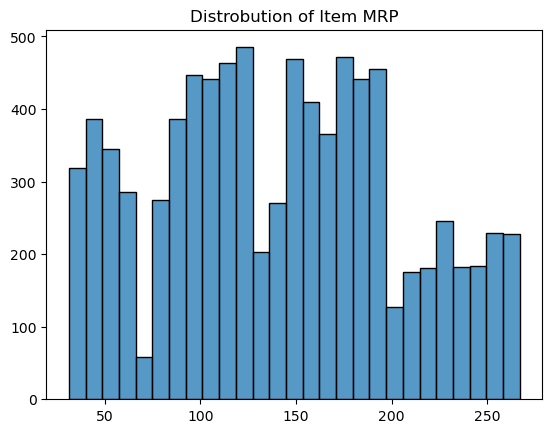

In [25]:
hist2(df, 'Item_MRP', title_label='Distrobution of Item MRP')

## Exploratory Data Analysis

In [26]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,-1.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Determine numerical columns
Check which columns are numeric so that categorical columns aren't accidentally used in the histograms.

In [28]:
# Filter for number columns
num_cols = df.select_dtypes('number').columns

In [29]:
for col in num_cols:
  print(f"{col}: {df[col].dtype}")
  # print("\n")

Item_Weight: float64
Item_Visibility: float64
Item_MRP: float64
Outlet_Establishment_Year: int64
Item_Outlet_Sales: float64


In [30]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Item Outlet Sales will be skewed on the graph because the mean is higher than the median.

### Identifying correlations

In [31]:
# Check numerics for correlations
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.079371,0.022367,0.537341,-0.055461
Item_Visibility,-0.079371,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022367,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.537341,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.055461,-0.128625,0.567574,-0.049135,1.000000


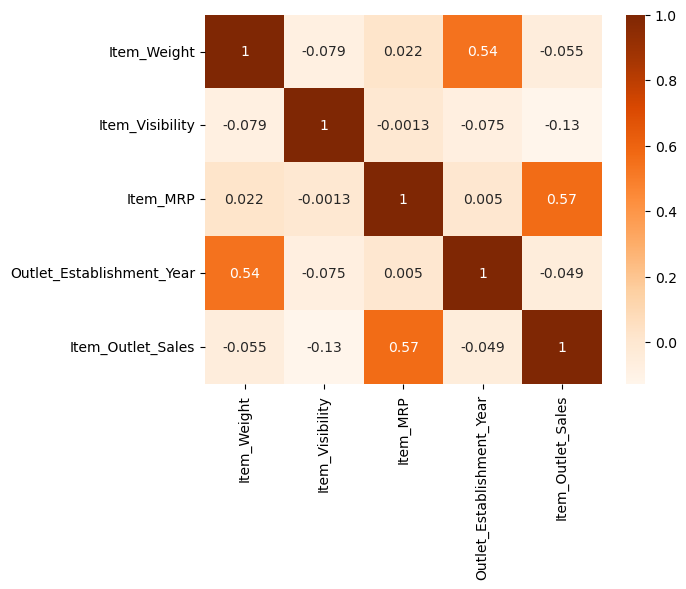

In [32]:
ax = sns.heatmap(corr, cmap='Oranges', annot=True)

Based on the output above:
  - Item MRP and Item Outlet Sales have a moderate correlation at 0.57
  - Item Visibility has no correlation with Item MRP
  - Outlet Year and Weight have a moderate correlation of 0.54, suggesting that some stores may have catered to items with a specific weight in the past (or currently do).

### Histograms for reviewing distrobution of data

Use a loop to print out histograms of all numerical columns for a "bird's eye" view of data.

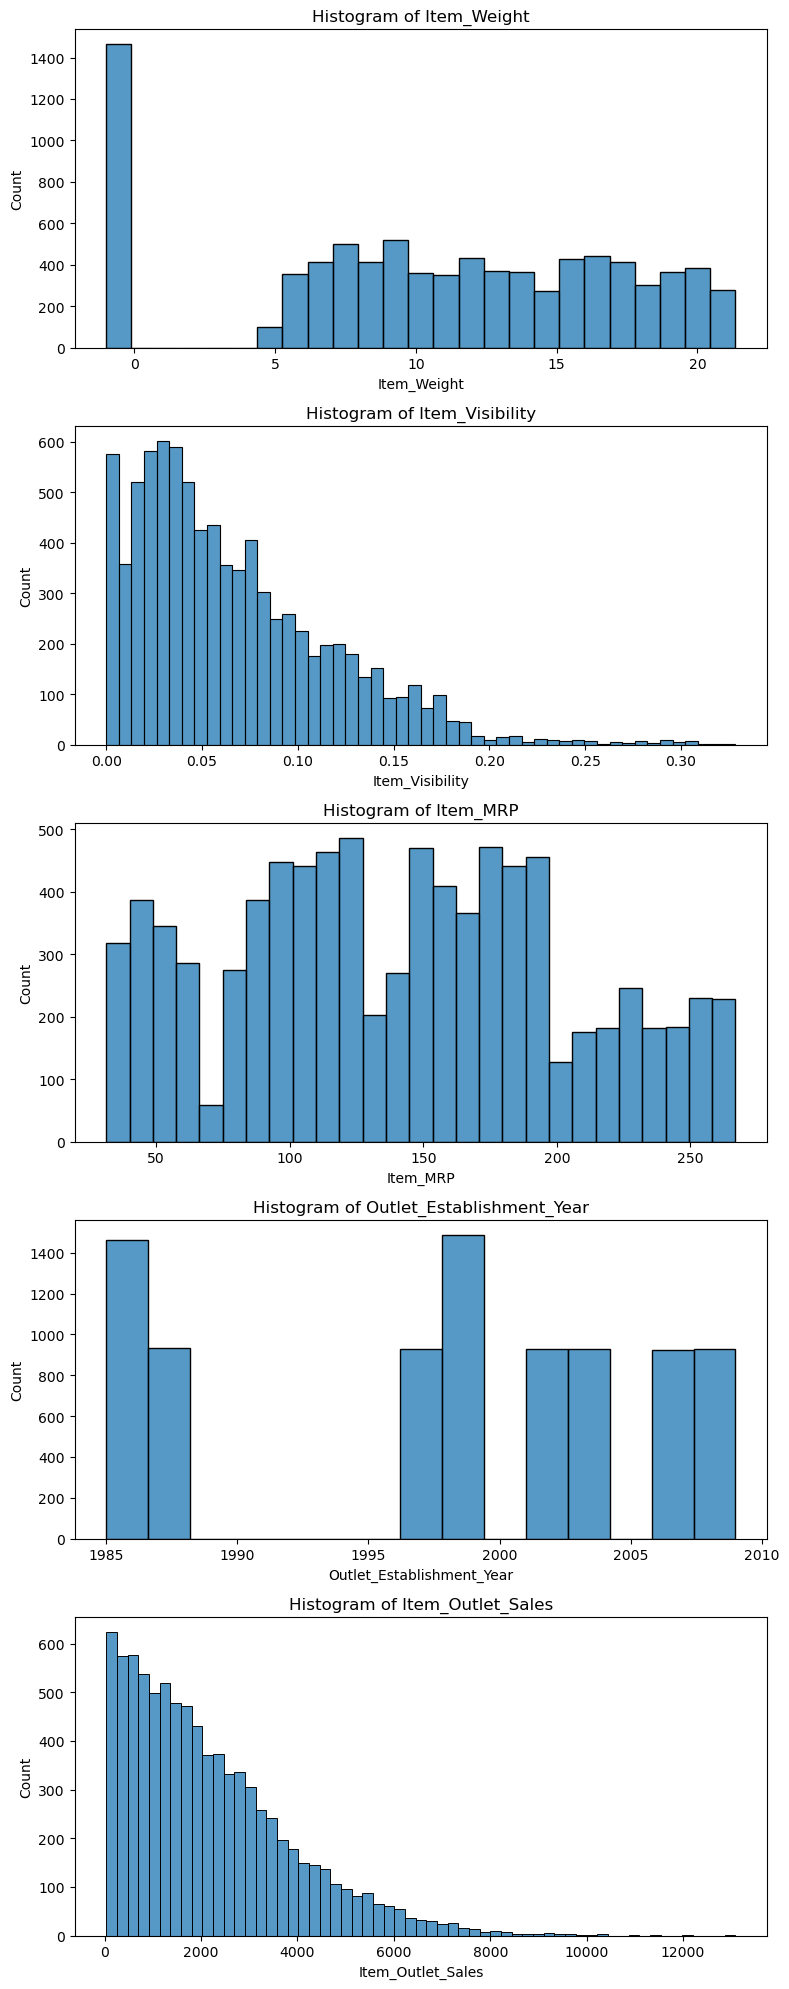

In [33]:
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 20))

# Generate a histogram of all numeric columns for easy comparision
for col, ax in zip(num_cols, axes):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f'Histogram of {col}')

# Use tight_layout for readability
plt.tight_layout()
plt.show()

### Boxplots for reviewing distrobution of data



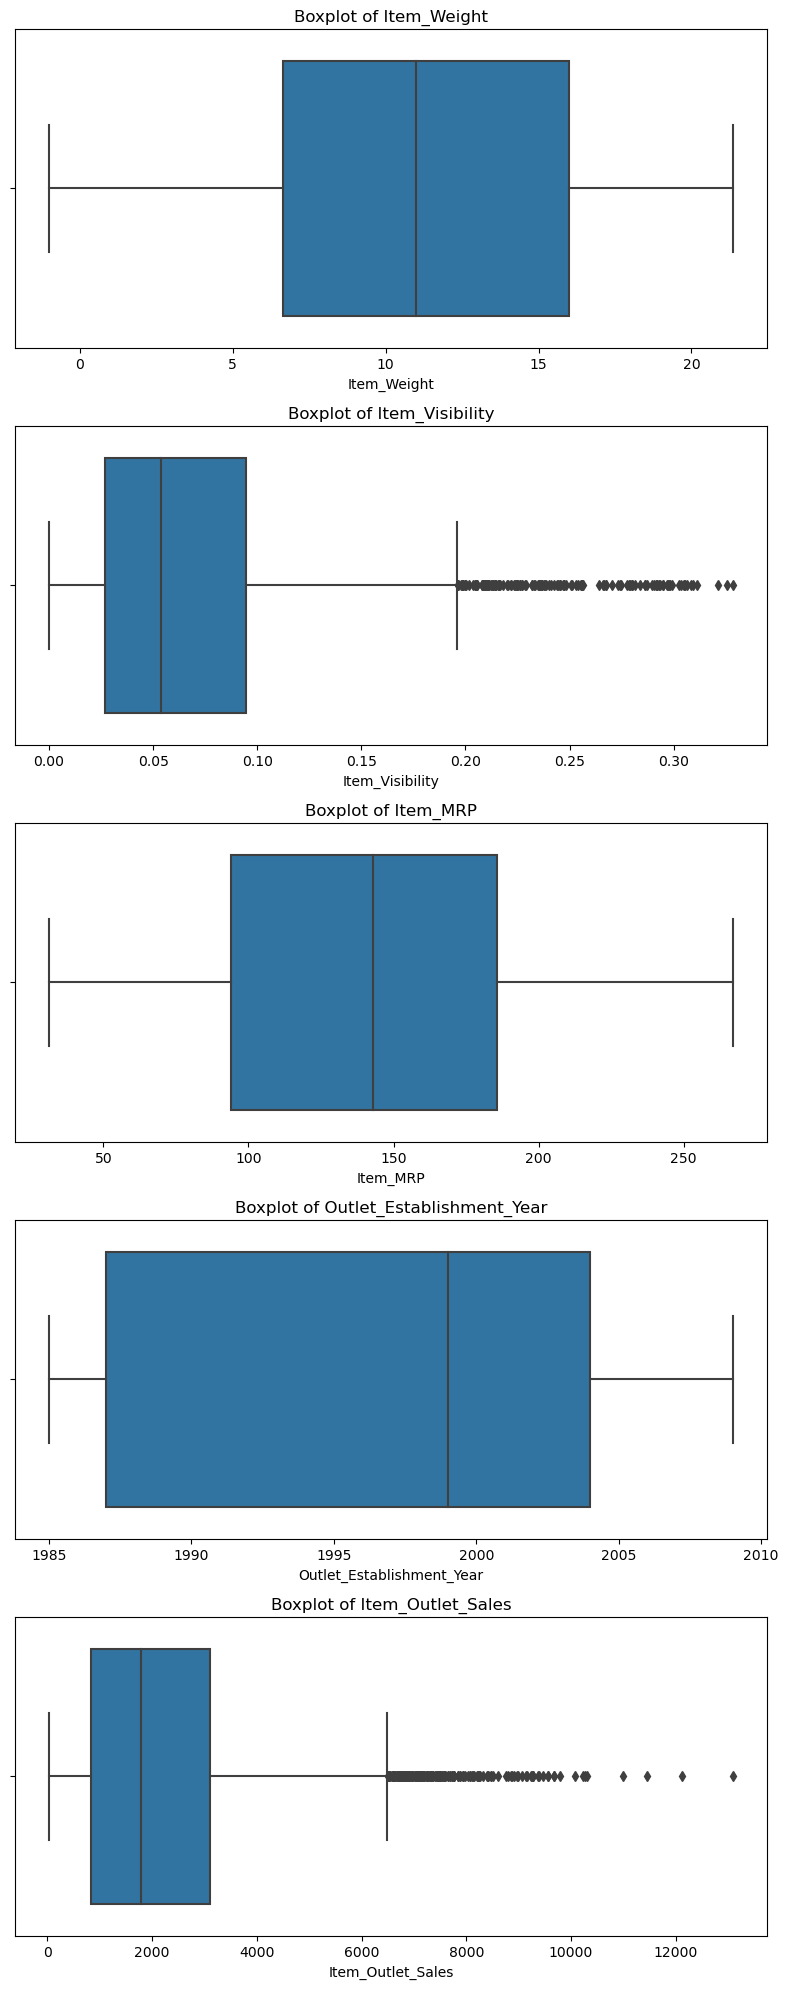

In [34]:
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 20))

# Generate a boxplot of all numeric columns for easy comparision
for col, ax in zip(num_cols, axes):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

# Use tight_layout for readability
plt.tight_layout()
plt.show()

- The boxplots show that both Item_Outlet_Sales and Item_Visibility have many outliers.
- The median of outlet establishment shows that most shops were opened around the 1998 or 1999.

## Explanatory Data Analysis

Can Item_MRP be grouped by outlet type? Do some outlet types have an overall higher average Item_MRP compared to others?

Which outlet type sold the most items?

In [35]:
means = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

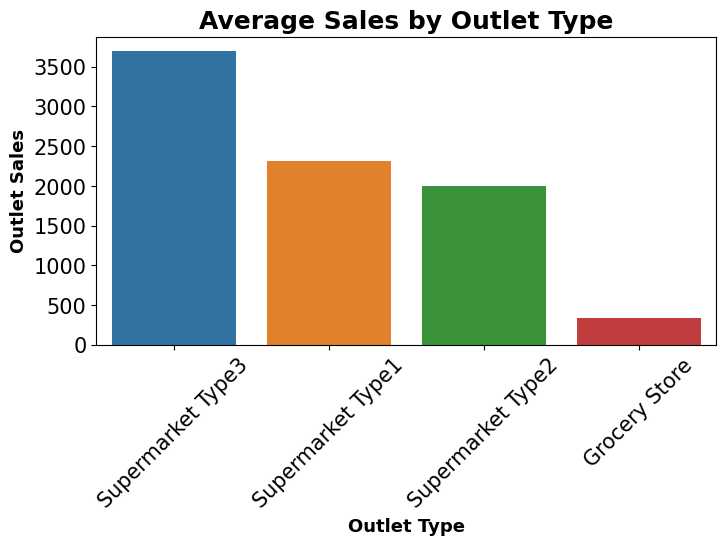

In [36]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=df, x='Outlet_Type', y ='Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales by Outlet Type', fontsize = 18, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 13, fontweight = 'bold')
ax.set_ylabel('Outlet Sales', fontsize = 13, fontweight = 'bold');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);

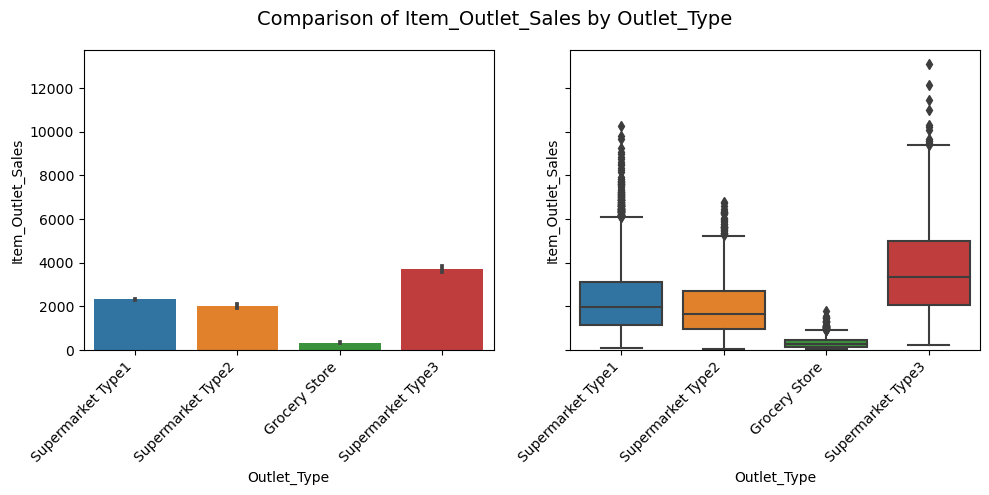

In [37]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# Box and bar plots
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[0])
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[1])

## Rotate xlabel in every subplot
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

## Set super title
fig.suptitle('Comparison of Item_Outlet_Sales by Outlet_Type', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Supermarket 3 sells more items on average compared to the others.

Does the weight of an item affect its price?
Are some heavier items located within specific outlet types?

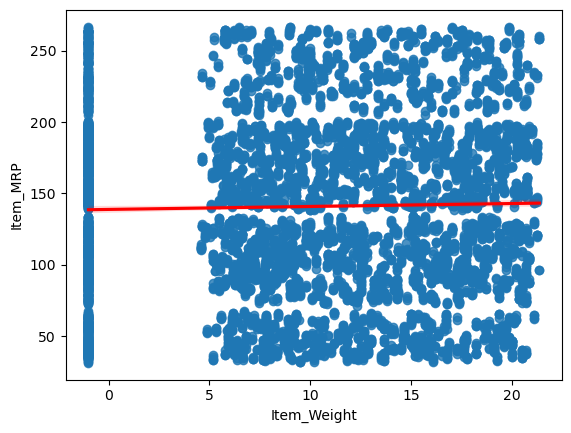

In [38]:
ax = sns.regplot(data=df, y='Item_MRP', x='Item_Weight', line_kws={'color':'red'})

Item weight does not appear to affect the MRP at all.

Does the outlet type affect the number of Item_Outlet_Sales?

Does MRP have an effect on the number of sales?

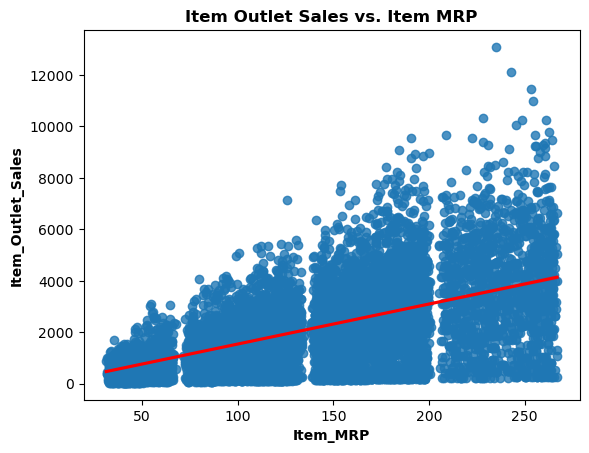

In [39]:
# Create the plot
ax = sns.regplot(data=df, y='Item_Outlet_Sales', x='Item_MRP', line_kws={'color':'red'})

# Set labels to bold
ax.set_xlabel('Item_MRP', weight='bold')
ax.set_ylabel('Item_Outlet_Sales', weight='bold')
# Set the title of the plot
ax.set_title('Item Outlet Sales vs. Item MRP', weight='bold')

# Show the plot
plt.show()

There is a moderate positive correlation. In general, the higher the MRP, the higher the amount of sales.

This leads to a new question - what types of items are popular? Based off of the chart, it can be assumed that the items that sell more will have a higher MRP.

# Modeling

Update imports

In [40]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

## Reload original data

Reload the original data to redo the cleaning and ensure there will not be any data leakage.

In [42]:
# Load original data
original_url = "Data/sales_predictions_2023.csv"
df2 = pd.read_csv(original_url)

In [ ]:
# Verify that the data was properly loaded
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Preprocessing Steps

In [43]:
# Check for duplicates
df2.duplicated().sum()

0

Fix inconsistencies

In [44]:
# Filter for categorical columns
cat_cols = df2.select_dtypes('object').columns

# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df2[col].value_counts())
  print("\n")


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


Inconsistent values found:

```
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
```

In [45]:
# Replace variations of "Low Fat" with "Low Fat"
df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

# Replace variations of "Regular" with "Regular"
df2['Item_Fat_Content'].replace({'reg': 'Regular'}, inplace=True)

In [47]:
# Confirm that fat variations have been fixed
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df2[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Train Test Split

Since the target is 'Item_Outlet_Sales, we can drop the identifier column, as it will not have any impact on the predictions.

In [49]:
df2.drop(columns="Item_Identifier", inplace=True)

In [50]:
target = 'Item_Outlet_Sales'

# Separate features vs target & train/test split
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2[target]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [52]:
print("X_train\n---------")
X_train.info()
print("\n\nX_test\n---------")
X_test.info()

X_train
---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


X_test
---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 10 columns):
 #   Co

## Column Transformer
Note - Numerical/Nominal/Build Preprocessor sections have been commented out and are to be removed upon confirmation that new preprocessor is not a breaking change.

In [58]:
# Categorical pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse_output=False)
                        )

# Numerical pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

# preprocessor
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000168B1C94790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000168B1C94850>)],
                  verbose_feature_names_out=False)

### Numerical Pipeline



In [ ]:
# # Get list of numeric columns and instantiate a StandardScaler & imputer
# num_cols = X_train.select_dtypes('number').columns
# scaler = StandardScaler()
# num_imputer = SimpleImputer(strategy='mean')

# # Construct the tuple for column transformer with the scaler
# num_tuple = ('numeric', make_pipeline(num_imputer, scaler), num_cols)
# # num_tuple = ('numeric',scaler, num_cols)
# num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

### Nominal Pipeline

In [ ]:
# # Get list of categorical columns and instantiate a pipeline with imputer and encoder
# cat_cols = X_train.select_dtypes('object').columns
# imputer_most_frequent = SimpleImputer(strategy='most_frequent')
# encoder_ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# # Construct the tuple for column transformer with the imputer and encoder pipeline
# cat_tuple = ('categorical', make_pipeline(imputer_most_frequent, encoder_ohe), cat_cols)
# cat_tuple


('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

None of the data within the columns imply a weighted order, where the order may be important.

As such, there is no need to make an ordinal pipeline.

### Build the Preprocessor

In [ ]:
# # Passing a list of tuples. Put the last parens on the same line as the last arg to follow PEP8 standards
# # Remember, the order of the tuples matter! Transformations happen according to the order of the tuples
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('numeric', make_pipeline(num_imputer, scaler), num_cols),
#         ('categorical', make_pipeline(imputer_most_frequent, encoder_ohe), cat_cols)
#     ],
#     verbose_feature_names_out=False
# )

# preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### Transform the Data

In [60]:
#Fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()


# Transform the training data
# X_train_processed = preprocessor.transform(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns = feature_names, index = X_train.index)

# Transform the testing data
# X_test_processed = preprocessor.transform(X_test)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns = feature_names, index = X_test.index)

# View the processed training data
X_test_df.head()

# TODO: replace all "X_test_processed" with "X_test_df"
# TODO: replace all "X_train_processed" with "X_train_df"


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.300000,0.026300,79.4302,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,7.930000,0.071136,42.7086,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,14.500000,0.041313,42.0454,1999.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,12.904458,0.044767,173.7054,1985.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,10.195000,0.012456,197.5110,2004.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Machine Learning - Training Models

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [62]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000168B1C94790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000168B1C94850>)],
                  verbose_feature_names_out=False)

In [63]:
# Make and fit model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000168B1C94790>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000168B1C94850>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

## Functions

In [64]:
def evaluate_regression(reg,X_train,y_train,X_test,y_test):
    """Uses model.score to display the R^2 values for training and test splits"""
    # Get predictions 
    train_preds = reg.predict(X_train)
    test_preds = reg.predict(X_test)
    print(f"Training R^2: {r2_score(y_train, train_preds):.2f}")
    print(f"Test R^2: {r2_score(y_test, test_preds):.2f}")

In [65]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  # rmse = mean_squared_error(y_true,y_pred,squared=False)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true,y_pred)

  
  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [66]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model2(y_true, y_pred, name='model', split='training'):
    """Takes true targets and predictions from a regression model and prints
    MAE, MSE, RMSE, and R2 scores, including which data split was evaluated.
    
    Args:
        y_true: True target values.
        y_pred: Predicted target values from the model.
        name: Name of the model (optional).
        split: Data split being evaluated ('training', 'test', etc.).
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'Results for {split} data:')
    print(f'{name} Scores')
    print(f'  - MAE: {mae:,.4f}')
    print(f'  - MSE: {mse:,.4f}')
    print(f'  - RMSE: {rmse:,.4f}')
    print(f'  - R2: {r2:.4f}')
    print()


## Linear Regression

In [67]:
# Get predictions to use to evaluate model
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

In [68]:
# Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.562
  - MAE = 847.129
  - MSE = 1297558.136
  - RMSE = 1139.104

Results for testing data:
  - R^2 = 0.567
  - MAE = 804.12
  - MSE = 1194349.715
  - RMSE = 1092.863



In [70]:
# Get coeffcients from model
# Need to use .named_steps because there is only a pipeline, and pipelines do not have .coef_ nor .intercept_ attributes
coeffs = pd.Series(linreg_pipe.named_steps['linearregression'].coef_, index=feature_names,
                        name='Coefficients')
coeffs.loc['intercept'] = linreg_pipe.named_steps['linearregression'].intercept_
coeffs.head()

Item_Weight                   -1.941817
Item_Visibility             -423.390180
Item_MRP                      15.720924
Outlet_Establishment_Year    -15.270632
Item_Fat_Content_Regular      62.625234
Name: Coefficients, dtype: float64

In [71]:
# Plots coefficients with annotations
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False,
                annotate=False, ha='left',va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        # sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        # rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        # sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    # plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    # return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

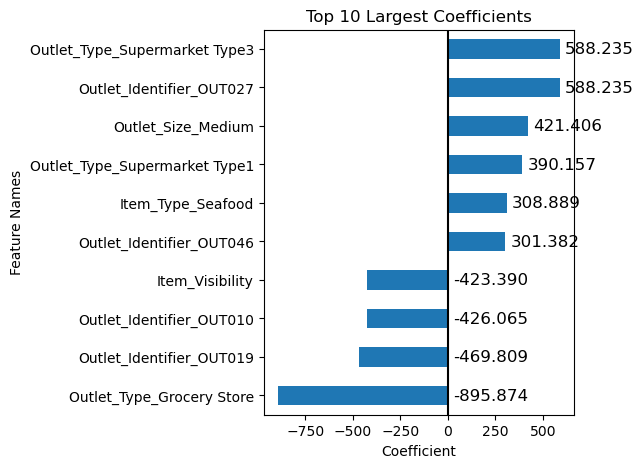

In [73]:
# Plot top 10 coefficients
plot_coeffs(coeffs,top_n=10,intercept=False,annotate=True);

- **The top 3 coefficients are:** Outlet_Type_Supermarket Type 3, Outlet_Identifier_OUT027, and Outlet_Size_Medium
  - Items sold at Outlet_Type_Supermarket Type3 stores may see an increase of sales by $588.235
  - Items sold at Outlet_Identifier_Medium stores may see an increase of sales by $588.235
  - Items sold at Outlet_Size_Medium stores may see an increase of sales by $421.406

- **The top 3 negative coefficients are:**
  - Outlet_Identifier_OUT010: Items sold at this store may sell less by $470.065
  - Outlet_Identifier_OUT019: Items sold at this store may sell less by $469.809
  - Outlet_Type_Grocery_Store: Items sold at this store may sell less by $895.874.

## Random Forest Regressor (Untuned)

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
ran_for_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
ran_for_pipe.fit(X_train, y_train)

# Get predictions for training and test data
y_hat_train = ran_for_pipe.predict(X_train)
y_hat_test = ran_for_pipe.predict(X_test)

In [76]:
# Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.938
  - MAE = 296.43
  - MSE = 182744.939
  - RMSE = 427.487

Results for testing data:
  - R^2 = 0.559
  - MAE = 765.748
  - MSE = 1216090.157
  - RMSE = 1102.765



### Random Forest Regressor (Untuned) Observations

- The training R2 has a good value of 93.8%, however the testing R2 is at 56%, meaning that the model suffers from overfitting.

- The training MAE has a low value of 293.606, meaning it is roughly off by about 300, however the testing MAE has a difference of about ~430 at 766.

In an untuned state, the model performs well with the training data but suffers from overfitting and does not perform well on unseen data, as indicated by the differences in MAE and R2.

- The model has a training R2 of 93.8% but an R2 of 56% on the testing set. This model has overfitting issues.

- The MAE testing score shows that it is off by \$1,244,585.12, but the training score is only off by \$296.60. It has a serious problem with unseen data.

The model is currently not recommended without further tuning.

# Feature Importances

In [82]:
# Get feature importances
feature_importance = pd.Series(ran_for_pipe.named_steps['randomforestregressor'].feature_importances_, index=feature_names,
                        name='Feature Importances')
feature_importance.head()

Item_Weight                  0.052769
Item_Visibility              0.098987
Item_MRP                     0.441359
Outlet_Establishment_Year    0.028154
Item_Fat_Content_Regular     0.008559
Name: Feature Importances, dtype: float64

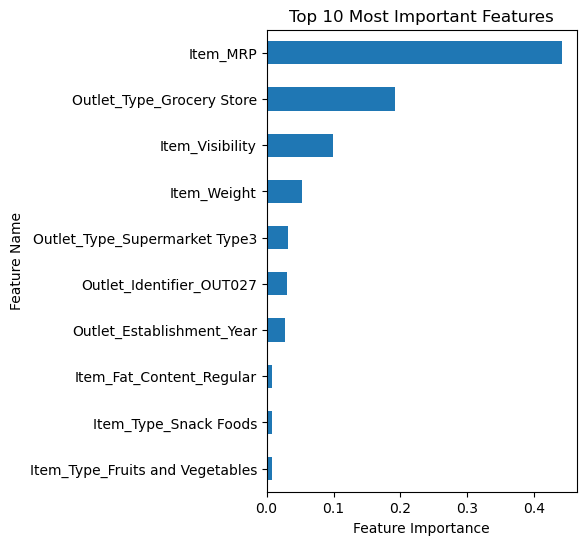

In [83]:
# Plot top 10 important features
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

Top 5 most important features:
- Item_MRP
- Outlet_Type_Grocery_Store
- Item_Visibility
- Item_Weight
- Outlet_Type_Supermarket Type3

In [84]:
# Save joblib file
import joblib

# Create a dictionary of all of the variables for future use
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
          'LinearRegression':linreg_pipe,
         'RandomForest':ran_for_pipe}
joblib.dump(export, 'random_forest_l01.joblib')

['random_forest_l01.joblib']

# To-Do:
- Remove old pipeline section and code
- Consider splitting OutletType column